# Analytic Continuation

## Theoretical Foundation

**Analytic continuation** is a fundamental technique in complex analysis that extends the domain of a given analytic function beyond its original region of definition. This powerful concept allows us to define functions on larger domains while preserving their analytic properties.

### Definition

Let $f(z)$ be an analytic function defined on a domain $D_1 \subset \mathbb{C}$. An **analytic continuation** of $f$ to a larger domain $D_2 \supset D_1$ is an analytic function $F(z)$ defined on $D_2$ such that:

$$F(z) = f(z) \quad \text{for all } z \in D_1$$

### Identity Theorem

The **Identity Theorem** guarantees uniqueness: If two analytic functions agree on a domain $D_1$, and both can be analytically continued to $D_2$, then their continuations must be identical on $D_2$. This is a consequence of the fact that an analytic function is uniquely determined by its values on any set with an accumulation point.

### Power Series Representation

A common method for analytic continuation uses power series. If $f(z)$ has a power series expansion around $z_0$:

$$f(z) = \sum_{n=0}^{\infty} a_n (z - z_0)^n$$

with radius of convergence $R$, then $f$ is analytic within the disk $|z - z_0| < R$. To extend beyond this disk, we choose a new center $z_1$ within the original disk and compute a new power series:

$$f(z) = \sum_{n=0}^{\infty} b_n (z - z_1)^n$$

This process can be repeated to extend the function along any path in the complex plane, provided we avoid singularities.

### Natural Boundary

Not all functions can be continued everywhere. A **natural boundary** is a curve beyond which analytic continuation is impossible. For example, the function:

$$f(z) = \sum_{n=0}^{\infty} z^{2^n}$$

has the unit circle $|z| = 1$ as a natural boundary.

### The Riemann Zeta Function Example

The most famous example is the **Riemann zeta function**:

$$\zeta(s) = \sum_{n=1}^{\infty} \frac{1}{n^s}$$

This series converges only for $\text{Re}(s) > 1$, but through analytic continuation, $\zeta(s)$ can be extended to the entire complex plane (except for a simple pole at $s = 1$). The functional equation:

$$\zeta(s) = 2^s \pi^{s-1} \sin\left(\frac{\pi s}{2}\right) \Gamma(1-s) \zeta(1-s)$$

relates values in the half-plane $\text{Re}(s) < 0$ to those in $\text{Re}(s) > 1$.

### Monodromy and Multi-valued Functions

Analytic continuation around singularities can lead to **multi-valued functions**. Consider $f(z) = \sqrt{z}$. Starting at $z = 1$ with $f(1) = 1$ and analytically continuing around the origin, we return to $z = 1$ but with $f(1) = -1$. This phenomenon is called **monodromy** and is handled using Riemann surfaces.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma, zeta
import matplotlib.patches as mpatches
from matplotlib.patches import Circle, FancyArrowPatch
from matplotlib import cm

## Computational Example 1: Power Series Continuation

We demonstrate analytic continuation using overlapping power series. Consider the function:

$$f(z) = \frac{1}{1-z}$$

This has a power series around $z_0 = 0$:

$$f(z) = \sum_{n=0}^{\infty} z^n \quad \text{for } |z| < 1$$

To extend beyond the unit circle, we create a new expansion around $z_1 = \frac{1}{2}$.

In [2]:
def power_series_at_origin(z, n_terms=20):
    """Compute 1/(1-z) using power series around z=0"""
    result = np.zeros_like(z, dtype=complex)
    for n in range(n_terms):
        result += z**n
    return result

def power_series_at_half(z, n_terms=20):
    """Compute 1/(1-z) using power series around z=1/2"""
    # 1/(1-z) = 2 * sum_{n=0}^{infty} (2(z-1/2))^n for |z-1/2| < 1/2
    w = z - 0.5
    result = np.zeros_like(z, dtype=complex)
    for n in range(n_terms):
        result += 2 * (2*w)**n
    return result

def exact_function(z):
    """Exact value of 1/(1-z)"""
    return 1.0 / (1.0 - z)

## Computational Example 2: Riemann Zeta Function

We'll visualize the Riemann zeta function in the complex plane, demonstrating its analytic continuation from $\text{Re}(s) > 1$ to the entire complex plane.

In [3]:
def plot_zeta_magnitude():
    """Plot magnitude of Riemann zeta function in complex plane"""
    # Create grid
    x = np.linspace(-2, 4, 400)
    y = np.linspace(-15, 15, 400)
    X, Y = np.meshgrid(x, y)
    Z = X + 1j*Y
    
    # Compute zeta function (scipy handles analytic continuation)
    zeta_values = np.zeros_like(Z, dtype=complex)
    
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            try:
                # Avoid the pole at s=1
                if np.abs(Z[i,j] - 1.0) > 0.1:
                    zeta_values[i,j] = zeta(Z[i,j])
                else:
                    zeta_values[i,j] = np.nan
            except:
                zeta_values[i,j] = np.nan
    
    magnitude = np.abs(zeta_values)
    # Cap very large values for visualization
    magnitude = np.minimum(magnitude, 10)
    
    return X, Y, magnitude, zeta_values

## Computational Example 3: Logarithm and Branch Cuts

The complex logarithm $\log(z)$ is multi-valued. We demonstrate how analytic continuation around the origin leads to different branches:

$$\log(z) = \ln|z| + i\arg(z)$$

where $\arg(z)$ is determined modulo $2\pi$.

In [4]:
def demonstrate_logarithm_branches():
    """Visualize different branches of the complex logarithm"""
    theta = np.linspace(0, 4*np.pi, 1000)  # Two full rotations
    r = 1.0  # Unit circle
    
    z = r * np.exp(1j * theta)
    
    # Compute log(z) = ln(r) + i*theta
    log_z = np.log(r) + 1j * theta
    
    # Also show the principal branch
    log_z_principal = np.log(z)
    
    return theta, log_z, log_z_principal

## Visualization: Complete Demonstration

We now create a comprehensive visualization showing:
1. **Power series domains**: Overlapping circles of convergence
2. **Riemann zeta function**: Magnitude plot showing analytic continuation
3. **Logarithm branches**: Spiral structure from multi-valued continuation
4. **Error analysis**: Comparing series approximations to exact values

Visualization saved as plot.png


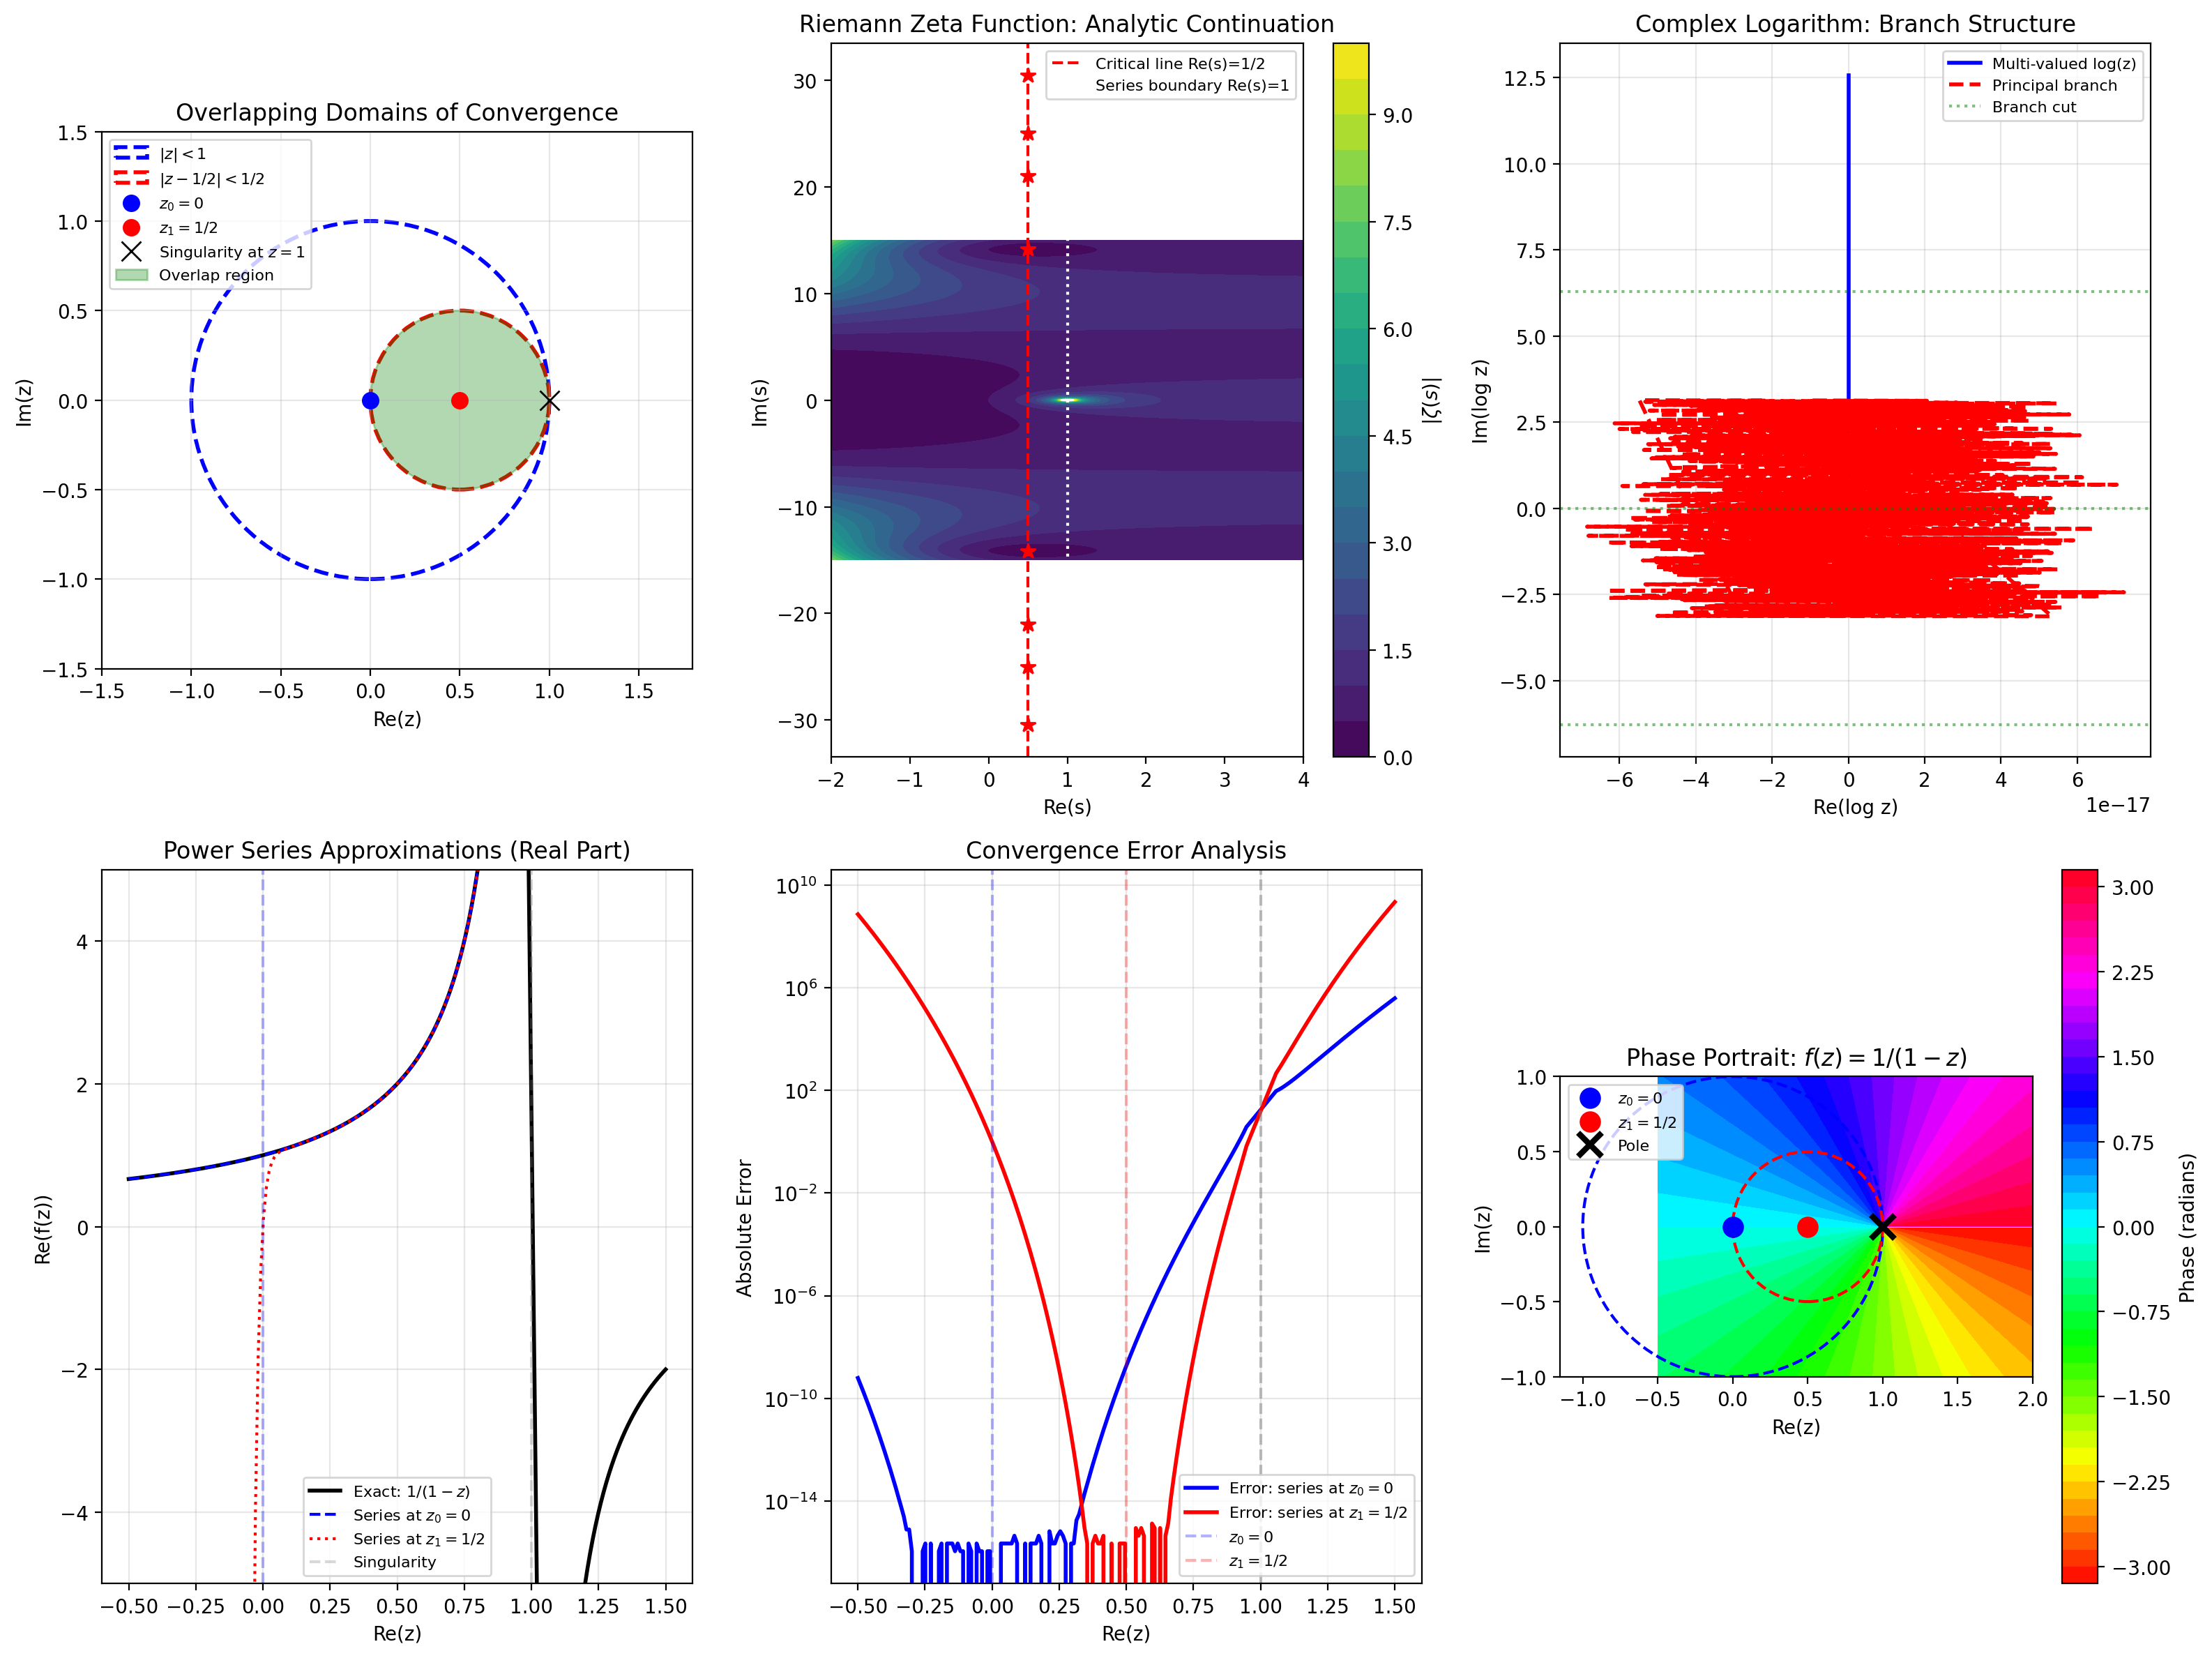

In [5]:
# Create comprehensive figure
fig = plt.figure(figsize=(16, 12))

# ==================== Panel 1: Power Series Domains ====================
ax1 = plt.subplot(2, 3, 1)
ax1.set_aspect('equal')

# Draw circles of convergence
circle1 = Circle((0, 0), 1, fill=False, edgecolor='blue', linewidth=2, linestyle='--', label='$|z| < 1$')
circle2 = Circle((0.5, 0), 0.5, fill=False, edgecolor='red', linewidth=2, linestyle='--', label='$|z - 1/2| < 1/2$')
ax1.add_patch(circle1)
ax1.add_patch(circle2)

# Mark centers
ax1.plot(0, 0, 'bo', markersize=8, label='$z_0 = 0$')
ax1.plot(0.5, 0, 'ro', markersize=8, label='$z_1 = 1/2$')
ax1.plot(1, 0, 'kx', markersize=10, label='Singularity at $z=1$')

# Shade overlap region
theta = np.linspace(0, 2*np.pi, 100)
x_overlap = 0.5 * np.cos(theta) + 0.5
y_overlap = 0.5 * np.sin(theta)
mask = x_overlap**2 + y_overlap**2 < 1
ax1.fill(x_overlap[mask], y_overlap[mask], alpha=0.3, color='green', label='Overlap region')

ax1.set_xlim(-1.5, 1.8)
ax1.set_ylim(-1.5, 1.5)
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('Re(z)')
ax1.set_ylabel('Im(z)')
ax1.set_title('Overlapping Domains of Convergence')
ax1.legend(loc='upper left', fontsize=8)

# ==================== Panel 2: Riemann Zeta Magnitude ====================
ax2 = plt.subplot(2, 3, 2)
X, Y, magnitude, zeta_values = plot_zeta_magnitude()

im = ax2.contourf(X, Y, magnitude, levels=20, cmap='viridis')
plt.colorbar(im, ax=ax2, label='$|\\zeta(s)|$')

# Mark the critical line Re(s) = 1/2
ax2.axvline(x=0.5, color='red', linestyle='--', linewidth=1.5, label='Critical line Re(s)=1/2')
# Mark Re(s) = 1 (boundary of series convergence)
ax2.axvline(x=1.0, color='white', linestyle=':', linewidth=1.5, label='Series boundary Re(s)=1')

# Mark some known zeros on critical line
zeros_im = [14.134725, 21.022040, 25.010858, 30.424876]  # First few non-trivial zeros
for zero_im in zeros_im:
    ax2.plot(0.5, zero_im, 'r*', markersize=8)
    ax2.plot(0.5, -zero_im, 'r*', markersize=8)

ax2.set_xlabel('Re(s)')
ax2.set_ylabel('Im(s)')
ax2.set_title('Riemann Zeta Function: Analytic Continuation')
ax2.legend(loc='upper right', fontsize=8)

# ==================== Panel 3: Logarithm Branches ====================
ax3 = plt.subplot(2, 3, 3)
theta, log_z, log_z_principal = demonstrate_logarithm_branches()

ax3.plot(np.real(log_z), np.imag(log_z), 'b-', linewidth=2, label='Multi-valued log(z)')
ax3.plot(np.real(log_z_principal), np.imag(log_z_principal), 'r--', linewidth=2, label='Principal branch')

# Mark branch cuts
ax3.axhline(y=0, color='green', linestyle=':', alpha=0.5, label='Branch cut')
ax3.axhline(y=2*np.pi, color='green', linestyle=':', alpha=0.5)
ax3.axhline(y=-2*np.pi, color='green', linestyle=':', alpha=0.5)

ax3.set_xlabel('Re(log z)')
ax3.set_ylabel('Im(log z)')
ax3.set_title('Complex Logarithm: Branch Structure')
ax3.legend(fontsize=8)
ax3.grid(True, alpha=0.3)

# ==================== Panel 4: Convergence Comparison ====================
ax4 = plt.subplot(2, 3, 4)

# Test points along real axis
x_test = np.linspace(-0.5, 1.5, 200)
z_test = x_test + 0.0j

# Avoid singularity
mask = np.abs(z_test - 1.0) > 0.05
z_safe = z_test[mask]

exact = exact_function(z_safe)
series_0 = power_series_at_origin(z_safe, n_terms=30)
series_half = power_series_at_half(z_safe, n_terms=30)

ax4.plot(np.real(z_safe), np.real(exact), 'k-', linewidth=2, label='Exact: $1/(1-z)$')
ax4.plot(np.real(z_safe), np.real(series_0), 'b--', linewidth=1.5, label='Series at $z_0=0$')
ax4.plot(np.real(z_safe), np.real(series_half), 'r:', linewidth=1.5, label='Series at $z_1=1/2$')

ax4.axvline(x=0, color='blue', alpha=0.3, linestyle='--')
ax4.axvline(x=1, color='gray', alpha=0.3, linestyle='--', label='Singularity')
ax4.set_xlabel('Re(z)')
ax4.set_ylabel('Re(f(z))')
ax4.set_title('Power Series Approximations (Real Part)')
ax4.legend(fontsize=8)
ax4.grid(True, alpha=0.3)
ax4.set_ylim(-5, 5)

# ==================== Panel 5: Error Analysis ====================
ax5 = plt.subplot(2, 3, 5)

error_0 = np.abs(exact - series_0)
error_half = np.abs(exact - series_half)

ax5.semilogy(np.real(z_safe), error_0, 'b-', linewidth=2, label='Error: series at $z_0=0$')
ax5.semilogy(np.real(z_safe), error_half, 'r-', linewidth=2, label='Error: series at $z_1=1/2$')

# Mark radius of convergence boundaries
ax5.axvline(x=0, color='blue', alpha=0.3, linestyle='--', label='$z_0=0$')
ax5.axvline(x=0.5, color='red', alpha=0.3, linestyle='--', label='$z_1=1/2$')
ax5.axvline(x=1.0, color='gray', alpha=0.5, linestyle='--')

ax5.set_xlabel('Re(z)')
ax5.set_ylabel('Absolute Error')
ax5.set_title('Convergence Error Analysis')
ax5.legend(fontsize=8)
ax5.grid(True, alpha=0.3)

# ==================== Panel 6: Phase Portrait ====================
ax6 = plt.subplot(2, 3, 6)

# Create phase portrait of 1/(1-z)
x_phase = np.linspace(-0.5, 2, 300)
y_phase = np.linspace(-1, 1, 300)
X_phase, Y_phase = np.meshgrid(x_phase, y_phase)
Z_phase = X_phase + 1j*Y_phase

# Avoid singularity
f_phase = 1.0 / (1.0 - Z_phase)
phase = np.angle(f_phase)

im = ax6.contourf(X_phase, Y_phase, phase, levels=50, cmap='hsv')
plt.colorbar(im, ax=ax6, label='Phase (radians)')

# Mark singularity and expansion points
ax6.plot(0, 0, 'bo', markersize=10, label='$z_0=0$')
ax6.plot(0.5, 0, 'ro', markersize=10, label='$z_1=1/2$')
ax6.plot(1, 0, 'kx', markersize=12, markeredgewidth=3, label='Pole')

# Draw circles of convergence
circle1_phase = Circle((0, 0), 1, fill=False, edgecolor='blue', linewidth=1.5, linestyle='--')
circle2_phase = Circle((0.5, 0), 0.5, fill=False, edgecolor='red', linewidth=1.5, linestyle='--')
ax6.add_patch(circle1_phase)
ax6.add_patch(circle2_phase)

ax6.set_xlabel('Re(z)')
ax6.set_ylabel('Im(z)')
ax6.set_title('Phase Portrait: $f(z) = 1/(1-z)$')
ax6.legend(fontsize=8, loc='upper left')
ax6.set_aspect('equal')

plt.tight_layout()
plt.savefig('analytic_continuation_analysis.png', dpi=300, bbox_inches='tight')
print("Visualization saved as plot.png")
plt.show()

## Key Insights

1. **Domain Extension**: The overlapping circles demonstrate how power series can be used to extend analytic functions beyond their initial radius of convergence.

2. **Uniqueness**: Within the overlap region (green shaded area), both power series converge to the same value, illustrating the Identity Theorem.

3. **Riemann Zeta**: The color map shows that $\zeta(s)$ is well-defined even for $\text{Re}(s) < 1$, despite the series only converging for $\text{Re}(s) > 1$. The red stars mark non-trivial zeros on the critical line.

4. **Branch Structure**: The logarithm plot reveals that continuing around the origin increases the imaginary part by $2\pi i$, demonstrating multi-valuedness.

5. **Convergence Regions**: The error analysis shows that each series approximation is accurate within its radius of convergence and diverges beyond it.

6. **Phase Continuity**: The phase portrait shows smooth variation except at the singularity, confirming analytic structure.

## Physical Applications

Analytic continuation appears throughout physics:
- **Quantum Field Theory**: Wick rotation continues physical time $t$ to imaginary time $it$ for path integral calculations
- **Statistical Mechanics**: Partition functions are continued from discrete to continuous temperatures
- **Scattering Theory**: S-matrix elements are continued from physical to unphysical energy values to locate resonances
- **String Theory**: Veneziano amplitude requires analytic continuation in Mandelstam variables